In [1]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
from collections import Counter

In [7]:
def getReviews (files, processed_path):
    """
    Extract reviews from raw data.
    
    :param files: File path
    :type  files: str
    :param processed_path: File path for the extracted reviews
    :type  processed_path: str
    :returns (list of dataframes, list of business names, list of csv file names)
    :rtype (list, list, list)
    """
    
    csv_files = glob.glob(files)
    names = [name.strip('Zip_Code_Scrape/').strip('.csv') for name in csv_files]
    csv_reviews = []
    review_files = pd.DataFrame ()
    for (i, file) in enumerate (csv_files):
        csv = pd.read_csv (file)["review-content"]
        csv = csv.dropna().reset_index().drop('index', axis=1)
        csv.columns = [names[i]]
        csv_reviews.append (csv)
        review_files = pd.concat ([review_files, csv], axis=1)
        
    review_files.to_csv (processed_path)
    return (csv_reviews, names, csv_files)

csv_reviews, names, csv_files = getReviews ("Zip_Code_Scrape/*.csv", 
                                            'Processed_Data/ZIP_ALL_REVIEWS.csv')

In [8]:
csv_reviews[1].head()

,60603_GODDESS
0,There are plenty of lunch options around the l...
1,There is NO BULLETPROOF COFFEE in this establi...
2,My friend and I enjoyed the coffees and breakf...
3,This place is so cute! I love to stare at the ...
4,Only giving this 4 instead of 5 because it get...


In [9]:
names[:5]

['60603_FAIRGROUNDS',
 '60603_GODDESS',
 '60603_NILLY',
 '60626_CHARMERS',
 '60626_SMACK']

In [10]:
csv_files[:5]

['Zip_Code_Scrape/60603_FAIRGROUNDS.csv',
 'Zip_Code_Scrape/60603_GODDESS.csv',
 'Zip_Code_Scrape/60603_NILLY.csv',
 'Zip_Code_Scrape/60626_CHARMERS.csv',
 'Zip_Code_Scrape/60626_SMACK.csv']

In [11]:
def createWordList (reviews, remove_punct=True):
    """
    Create a list of reviews.
    
    :param reviews: List of dataframes
    :type  reviews: list
    :param remove_punct: If true, remove punctuations.
    :type  remove_punct: bool
    :returns: A list where each element is string of all reviews for one business. 
    :rtype:  list
    """
    
    word_list = []
    for (i, csv) in enumerate (reviews):
        all_words = ""
        for (index, row) in csv.iterrows():
            all_words += row [names[i]]
        all_words = all_words.lower()
        
        if remove_punct:
            word_list.append (re.sub('[()!@%^&*-+\$.,?"#\xa0]', ' ', all_words))
        else:
            word_list.append(all_words)
    return word_list

word_list = createWordList (csv_reviews)
word_list[1][:500]

'there are plenty of lunch options around the loop area and i am on a mission to try each and every one of them  i came across goddess and the baker and was delighted by their display of desserts and baked goods  the place is fairly small and has limited seating  so i decided to grab an order to go  i was trying to keep it on the healthy side  so i opted for the grilled salmon kale caesar salad  lunch hours everywhere are pretty chaotic  but this place can get crowded to a whole new level  when i'

In [12]:
punct_word_list = createWordList (csv_reviews, remove_punct=False)
punct_word_list[1][:500]

'there are plenty of lunch options around the loop area and i am on a mission to try each and every one of them. i came across goddess and the baker and was delighted by their display of desserts and baked goods. the place is fairly small and has limited seating, so i decided to grab an order to go. i was trying to keep it on the healthy side, so i opted for the grilled salmon kale caesar salad. lunch hours everywhere are pretty chaotic, but this place can get crowded to a whole new level. when i'

In [14]:
def findWordFreq (word_list, names, threshold = 20):
    """
    Count the word frequency in each element of the list.
    Filter out the common words that do not provide any valuable information.
    Keep keywords.
    
    :param word_list: A list where each element is string of all reviews for one business. 
    :type  word_list: list
    :param names:
    :type  names:
    :param threshold: Minimum number of word appearances
    :type  threshold: int
    :returns: A dictionary of dictionaries. 
              Each key is a business name, and each value is a dictionary.
              In that dictionary, the keys are words and frequencies are the values.
    :rtype:   dict
    """
    
    common_words = pd.read_csv ('Word_Lists/commonwords.csv')['WORDS'].values.tolist()
    keywords = pd.read_csv ('Word_Lists/keywords.csv')['WORDS'].values.tolist()
    csv_counter = {}
    for i in range (len (word_list)):
        unique_words = Counter (word_list[i].split())
        filter_unique_words = {}
        for key in unique_words:
            if (not (key in common_words)) and ((key in keywords) or (unique_words[key] > threshold)):
                filter_unique_words[key] = unique_words[key] 
        csv_counter[names[i]] = filter_unique_words
    return csv_counter

csv_counter = findWordFreq (word_list, names)
#type (csv_counter)
csv_counter

{'60603_FAIRGROUNDS': {'art': 2,
  'chicago': 34,
  'coffee': 118,
  'cold': 23,
  'drink': 23,
  'fairgrounds': 33,
  'friend': 7,
  'friendly': 28,
  'great': 39,
  'location': 23,
  'matcha': 24,
  'meeting': 3,
  'outlets': 1,
  'picture': 1,
  'place': 34,
  'seasonal': 1,
  'seating': 24,
  'shop': 23,
  'space': 3,
  'staff': 22,
  'style': 1,
  'subway': 1,
  'vibe': 3,
  'wifi': 2,
  'working': 1},
 '60603_GODDESS': {'-': 34,
  'amazing': 29,
  'around': 23,
  'art': 8,
  'avocado': 31,
  'baked': 29,
  'baker': 44,
  'bakery': 35,
  'before': 30,
  'bit': 40,
  'both': 24,
  'breakfast': 37,
  'cafe': 33,
  'cake': 89,
  'chicago': 41,
  'chocolate': 37,
  'coffee': 158,
  'community': 4,
  'cute': 50,
  'definitely': 34,
  'delicious': 47,
  'desserts': 22,
  "didn't": 32,
  'drink': 39,
  'drinks': 60,
  'eat': 29,
  'everything': 23,
  'find': 27,
  'flavor': 21,
  'food': 66,
  'free': 22,
  'fresh': 21,
  'friend': 18,
  'goddess': 57,
  'goods': 27,
  'great': 78,
  'ha

In [17]:
def createplot (csv_counter):
    """
    Creates plots for each business based on word frequencies.
    Saves plots to folder "Plots".
    
    :param csv_counter: A dictionary of dictionaries. 
              Each key is a business name, and each value is a dictionary.
              In that dictionary, the keys are words and frequencies are the values.
    :type  csv_counter: dict
    """
    # Create the bar graphs of top words for each business
    # Output the bar graphs to the folder "plots"
    df_occurences = pd.DataFrame (csv_counter)
    for column in df_occurences:
        name = column#.strip('scraped/').strip('.csv')
        plot = df_occurences[column].dropna()
        plot.plot(kind="bar")
        plt.title(name)
        fig = plt.gcf()
        fig.set_size_inches(15,8)
        plt.savefig('Plots/' + name + '.png', bbox_inches='tight')
        plt.show()
        
#createplot(csv_counter)

In [71]:
def pipeline ():
    """
    Put everything together.
    """
    csv_reviews, names, csv_files = getReviews ("Raw_Scraped_Data/*.csv", 
                                            'Processed_Data/all_reviews.csv')
    word_list = createWordList (csv_reviews)
    csv_counter = findWordFreq (word_list)
    createplot(csv_counter)
#pipeline()

In [15]:
def GroupByLocation (names, word_list):
    """
    :param names: list of names of businesses
    :type  names: list
    :param word_list: A list where each element is string of all reviews for one business. 
    :type  word_list: list
    :returns: (list of group names, list of strings of concated reviews)
    :rtype:   (list, list)
    """
    
    listOfGroups = []
    for name in names:
        listOfGroups.append ( name.split('_')[0])
    setOfGroups = set (listOfGroups)
    
    placeAndReviews = {}
    for group in setOfGroups:
        placeAndReviews[group] = ''
        
    for i in range (len (names)):
        group = names[i].split('_')[0]
        review = placeAndReviews.get(group)
        placeAndReviews[group] = review + word_list[i]
     
    groups = []
    reviews = []
    for key, val in placeAndReviews.items():
        groups.append (key)
        reviews.append (val)
    #return placeAndReviews
    return (groups, reviews)
     
groups, groupReviews = GroupByLocation (names, word_list)

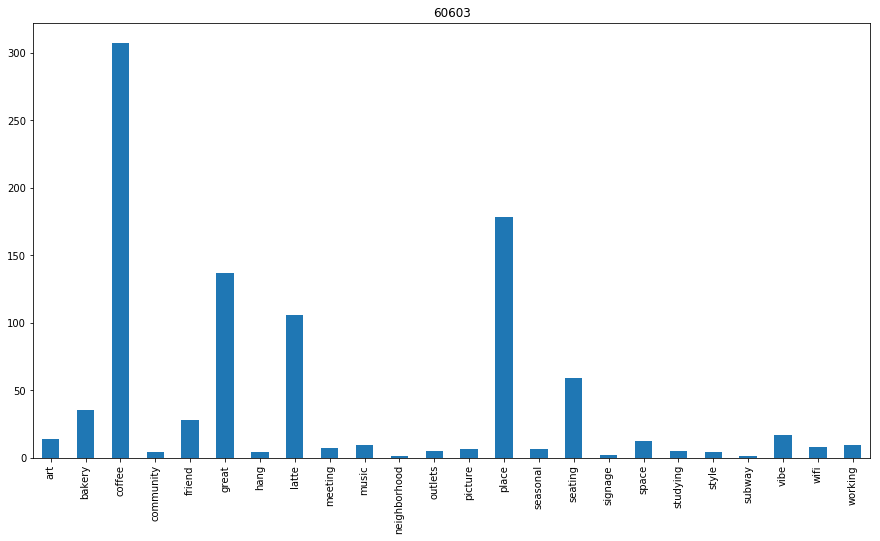

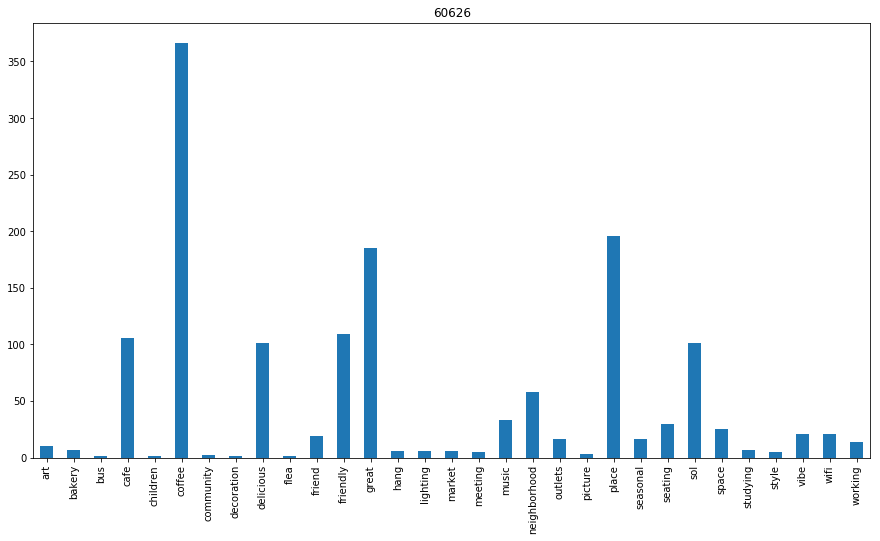

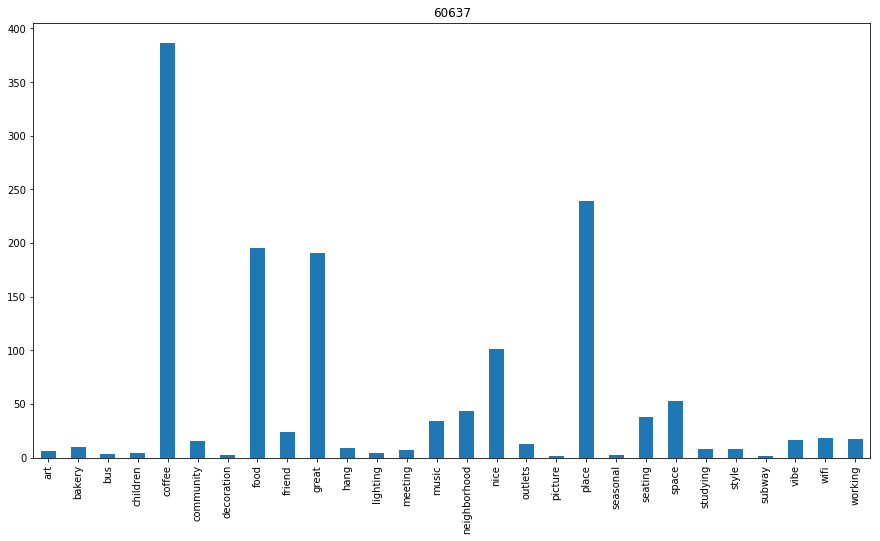

In [18]:
groupWordList = findWordFreq (groupReviews, groups, threshold=100)
createplot (groupWordList)

In [19]:
punct_groups, punct_groupReviews = GroupByLocation (names, punct_word_list)
punct_groupReviews[1][:500]

"harper café is arguably the best coffee shop in hyde park. they play some of the best music i've ever heard and conversing with their baristas makes me feel very sophisticated. i'm a big fan of their london fog--who knew that i'd find a little slice of london, uk in chicago, us :-) !!if you're feeling hungry, check out their vegan food options. so delightful!!i love harper café! it is so conveniently located and always poppin'. the baristas are consistently the hottest on campus. especially ori-"

In [21]:
def groups_to_json (names, reviews, file_name):
    """
    Given keys and values, dump out a json file.
    
    :param names: List of groups
    :type  names: list
    :param reviews: List of strings, where each string are all the reviews for one group
    :type  reviews: list
    :param file_name: File name of output json
    :type  file_name: str
    """
    import json
    dict_of_reviews = {}
    for i in range (len (names)):
        dict_of_reviews[names[i]] = reviews[i]
        
    with open(file_name, 'w') as outfile:
        json.dump (dict_of_reviews, outfile)
    #return dict_of_reviews
    
groups_to_json (punct_groups, punct_groupReviews, 'Processed_Data/ZIP_Grouped_Reviews')